In [3]:
from sympy.parsing.sympy_parser import parse_expr

In [2]:
parse_expr("0.3x + 3y", evaluate=True, local_dict={"x": 10, "y": 3, "z": 5}, transformations="all")

12

In [1]:
from graphs import graph

x = graph(graph="line", variables=["Goog"],
    expression_array = ["Goog = _avg(_GOOG(return, 10d, 1d))", "apple_return = _AAPL(adj_close, 10d)"],
    assets = ["GOOG", "AAPL"], backdate_period = 10)
# from expression import Expression
# expr = Expression(assets = ["GOOG"], str_expression = "_GOOG(return, 10d, 1d)")
# expr.evaluate(backdate=10)

TypeError: graph() missing 2 required positional arguments: 'assets' and 'backdate_period'

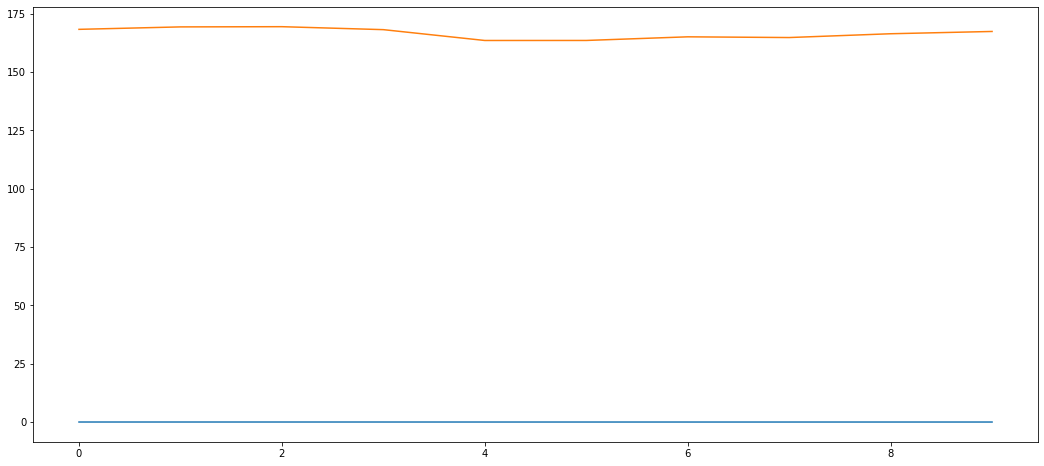

In [27]:
import matplotlib.pyplot as plt
a = x['Goog']
b = x['apple_return']
fig = plt.figure(figsize = (18,8))
plt.plot(a.index, a)
plt.plot(b.index, b)

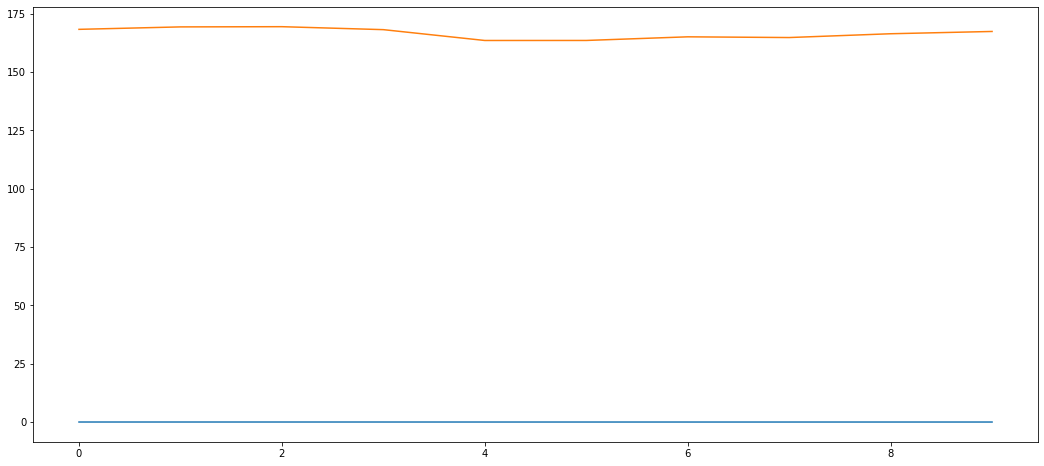

In [28]:
fig

In [4]:
expr.get_function_arguments("_transpose(AAPLreturn10d1d_0 + AAPLvolume10d1d_1)")

['AAPLreturn10d1d_0+AAPLvolume10d1d_1']

In [23]:
from sympy import Matrix, parse_expr

m = Matrix([1, 2, 3])

parse_expr("m/m", local_dict={"m": m}, evaluate=True)

TypeError: unsupported operand type(s) for /: 'One' and 'MutableDenseMatrix'

In [1]:
from numericals import Numerical

numer = Numerical()
numer.get_historical_data("AAPL", "10d", "1d")

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume,return
Date,,,,,,,
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.307190,48425700,-0.006191
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.218704,65136000,-0.006467
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.560989,81235400,-0.009913
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.330261,113316400,0.046927
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800,-0.000403
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900,-0.009971
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500,0.010421
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700,0.001095
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800,-0.005418


In [2]:
numer.get_historical_data("AAPL", "10d", "1d", backdate=2)

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume,return
Date,,,,,,,
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.445618,55209200,0.007541
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.355743,52472900,-0.000530
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.307190,48425700,-0.006191
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.218704,65136000,-0.006467
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.560989,81235400,-0.009913
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.330261,113316400,0.046927
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800,-0.000403
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900,-0.009971
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500,0.010421


In [3]:
from expression import Expression

expr = Expression(assets=["AAPL"], str_expression="_avg(3)")
expr.evaluate()

evaluating complex expression
expression:  _avg(3)
innermost functions:  ['_avg(3)']
{'AAPLreturn10d1d_0': Matrix([
[-0.000530401841079775],
[ -0.00619142549107132],
[ -0.00646725620071475],
[ -0.00991345347068961],
[   0.0469269474632046],
[-0.000403367369252505],
[ -0.00997112231930308],
[   0.0104208753759483],
[  0.00109475392335234],
[ -0.00541756894991818]]), 'avgAAPLreturn10d1d0_0': 0.0019547981120475954}
avg3_0


3.00000000000000

In [10]:
from expressiontree import *

# solve_expression("3x^2 + AAPLreturn10d1d_0", variable_dict={"AAPLreturn10d1d_0": 10}  )
get_ordered_operations("3x^2 + AAPLreturn10d1d_0")

['x**2', '3*x**2', 'AAPLreturn10d1d_0 + 3*x**2']

In [10]:
from expressiontree import *

solve_expression("x *  30", {"x": Matrix([1, 2, 3]).T, "y": Matrix([2, 3, 4])})

Matrix([[30, 60, 90]])

In [51]:
# solve_expression("x + y + 100", {"x": 3, "y": 10})
get_ordered_operations("x + (y + 100)")

['x + y + 100']

In [1]:
from expressiontree import *

[*********************100%***********************]  1 of 1 completed


Matrix([
[  -21216073643191/40000000000000000],
[ -154785637276783/25000000000000000],
[   -25869024802859/4000000000000000],
[-991345347068961/100000000000000000],
[   234634737316023/5000000000000000],
[ -80673473850501/200000000000000000],
[ -249278057982577/25000000000000000],
[  104208753759483/10000000000000000],
[   54737696167617/50000000000000000],
[ -270878447495909/50000000000000000]])

In [15]:
from expression import Expression
expr = Expression(portfolio_assets = ["AAPL", "MSFT"], str_expression = "_max(_AAPL(return, 10d, 1d)) + 0.1")

try:
    result = expr.evaluate("this is the part of me")
except SyntaxError:
    pass

print(result)

NameError: name 'result' is not defined

In [4]:
from expressiontree import *
get_ordered_operations("x^(2y) + 3x + 7")

['2*y', 'x**(2*y)', '3*x', '3*x + x**(2*y) + 7']

In [26]:
from sympy import *

Matrix([1, 2, 2]) + 3

TypeError: cannot add <class 'sympy.matrices.dense.MutableDenseMatrix'> and <class 'int'>

In [8]:
def get_innermost_functions(str_expression, arguments_count):

    # The ",\s*\w+" extracts a single argument. We want to be flexible with the
    # number of arguments we can extract. For instance, if we wnat to extract
    # an inner function that accepts two arguments, the regex for that will
    # be r"\w+\(\w+\s*,\s*\w+\)". That is what we are doing here
    r = "".join([",\s*\w+\s*" for i in range(arguments_count-1)]) + r"\)"
    regex = r"\w+\(\s*\w+\s*" + r

    return re.findall(regex, str_expression)

what = get_innermost_functions(str_, 3)
what

NameError: name 'str_' is not defined

In [2]:
my_arr = ["AAPL", "What"]
what = ["_"+i for i in my_arr]
what

['_AAPL', '_What']

In [1]:
from expression import Expression
strr = "_AAPL(return, 1d) + _AAPL(return, 10d, 1d)"
expr = Expression(str_expression=strr, portfolio_assets=["AAPL", "MSFT"])
expr.evaluate()

[*********************100%***********************]  1 of 1 completed


'0.006432995866882063 + _AAPL(return, 10d, 1d)'

In [12]:
simple_functions_used = expr.get_simple_functions()
simple_functions_used

{'_AAPL': ['_AAPL(return, 1d)']}

In [1]:
from numericals import Numerical

numerical = Numerical()
data = numerical.get_historical_data("AAPL", period="2d")
data

period:  3d
[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume,return
Date,,,,,,,
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45285300,-0.009971
2023-05-10,173.020004,174.029999,172.320007,173.670105,173.670105,21280764,0.011062


In [7]:
data = data.iloc[1:, :]
data

,open,high,low,close,adj_close,volume,return
Date,,,,,,,
2023-05-10,173.020004,174.029999,172.320007,173.744995,173.744995,21196692,0.011498


In [14]:

f_expression_results = {}
for f in simple_functions_used:
    for expression in simple_functions_used[f]:
        
        val = evaluate_simple_function(function_=f, expression=expression)
        f_expression_results[expression] = val

for key in f_expression_results:
    str_expression = str_expression.replace(key, str(f_expression_results[key]))

[*********************100%***********************]  1 of 1 completed


NameError: name 'str_expression' is not defined

In [6]:
import yfinance as yf

yf.download("AAPL", period="10d")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45285300
